#### Suppose we have data for two different classes. We want to build a decision tree model to classify the data. When we plot the data, we get two concentric circles where each group belongs to one circle. How will the decision boundary look like and why?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
x1 = np.linspace(-5, 5, num=200)
x2 = [np.sqrt(25-i**2) for i in x1]
x2 = [i if random.random() > 0.5 else -1*i for i in x2]
y_1 = np.ones((200,))
x_1 = np.concatenate((np.array(x1).reshape(200,1),
                        np.array(x2).reshape(200,1)), axis=1)


x3 = np.linspace(-4, 4, num=200)
x4 = [np.sqrt(16-i**2) for i in x3]
x4 = [i if random.random() > 0.5 else -1*i for i in x4]
y_0 = np.zeros((200,))
x_0 = np.concatenate((np.array(x3).reshape(200,1),
                        np.array(x4).reshape(200,1)), axis=1)


X = np.vstack((x_1, x_0))
y = np.append(y_1, y_0)

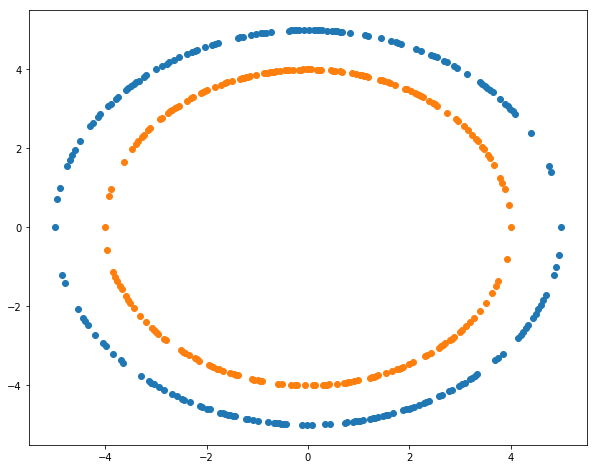

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x1, x2)
ax.scatter(x3, x4)

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
clf = DecisionTreeClassifier()

In [7]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

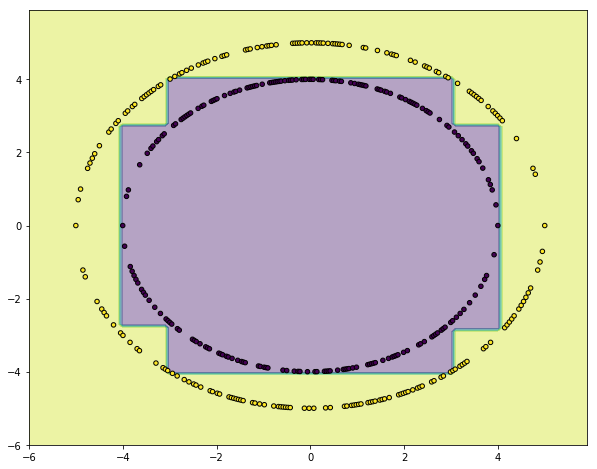

In [8]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolor='k')


### The decision boundary for classification trees is axis aligned.